# Mounting the google drive

In [1]:
# Mounting the google drive to get the images

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing useful libraries and data reading

In [3]:
# Importing useful libraries

import numpy as np # For numerical computations
import pandas as pd # For dataframe related tasks

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To remove unneccesary warnings
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBRegressor # For model training
from sklearn.model_selection import train_test_split # Fro train test splitting
from sklearn import metrics # For model evaluation

import pickle # For model saving

In [4]:
# Specifying the location for all our data is located

data_folder_path = 'drive/MyDrive/AI_project_data/'

In [6]:
# Reading the calory data

calories_df = pd.read_csv(data_folder_path + 'calories_data.csv')
calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
# Reading the excercise data

exercise_df = pd.read_csv(data_folder_path + 'exercise_data.csv')
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
# Lets merge the two dataframes based on the user id column

df = pd.merge(calories_df,exercise_df,on='User_ID')
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


# Data cleaning and visualization

In [11]:
# Lets see the shape of our datasaet

df.shape

(15000, 9)

In [12]:
# Lets check the statstical measures of our numerical columns

df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [13]:
# Lets see which column is numerical and which is not

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [14]:
# Lets see for any missing value in the dataset

df.isna().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

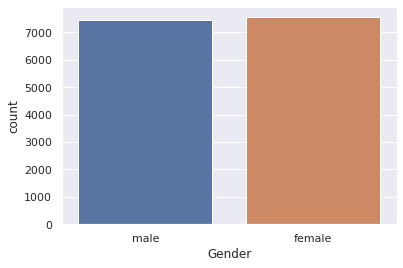

In [15]:
# Lets visualize the sex column

sns.set()
sns.countplot(data=df,x='Gender')
plt.show()

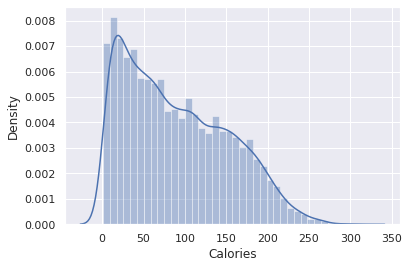

In [16]:
# Lets visualize the calories burnt column using ditribution plot

sns.distplot(df['Calories'])
plt.show()

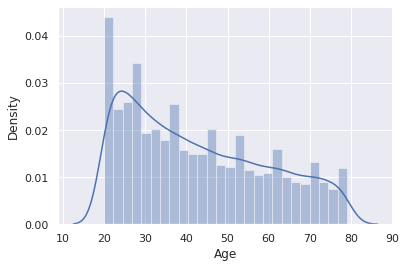

In [17]:
# Lets visualize the age column using ditribution plot

sns.distplot(df['Age'])
plt.show()

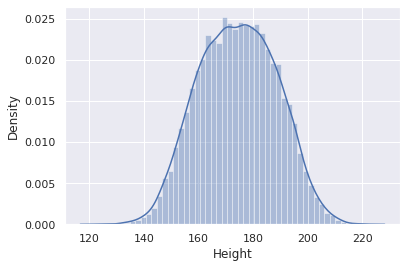

In [18]:
# Lets visualize the Height column using ditribution plot

sns.distplot(df['Height'])
plt.show()

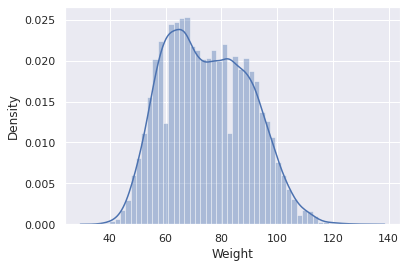

In [19]:
# Lets visualize the Weight column using ditribution plot

sns.distplot(df['Weight'])
plt.show()

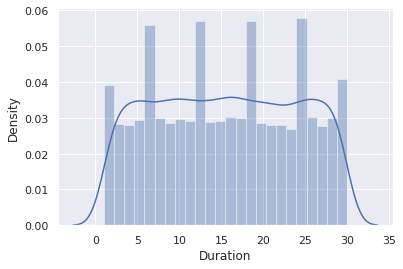

In [22]:
# Lets visualize the Duration column using ditribution plot

sns.distplot(df['Duration'])
plt.show()

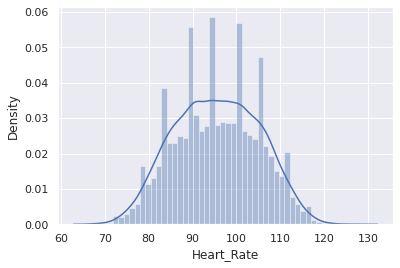

In [24]:
# Lets visualize the Heart rate column using ditribution plot

sns.distplot(df['Heart_Rate'])
plt.show()

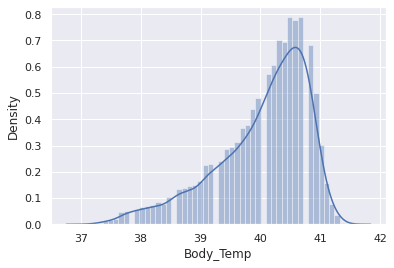

In [25]:
# Lets visualize the Body temperature column using ditribution plot

sns.distplot(df['Body_Temp'])
plt.show()

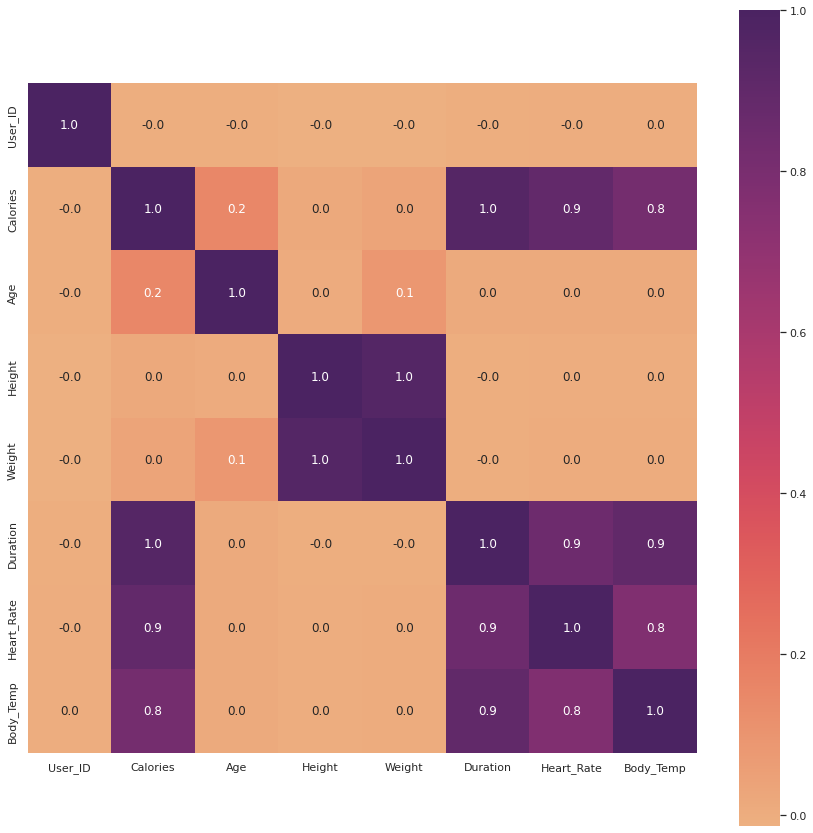

In [33]:
# Lets create a correlation matrix to see how different columns are correlated

corr = df.corr()

plt.figure(figsize=(15,15))

sns.heatmap(corr,
            cbar=True,
            square=True,
            fmt='.1f',
            annot=True,
            cmap='flare'
            )
plt.show()

In [36]:
# Lets see which columns are non-numerical

categorical_cols = []
for column in list(df.columns):
  if df[column].dtype == 'O':
    categorical_cols.append(column)
categorical_cols

['Gender']

In [37]:
# Encoding to change all the categorical columns into numerical

for col in categorical_cols:
  categories = list(df[col].value_counts().index)
  for i,category in enumerate(categories):
    df[col] = df[col].apply(lambda x:i if x == category else x)

In [38]:
# Checking if the gender column is changed to numerical succesfuly

df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,1,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,0,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,1,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,0,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,0,27,154.0,58.0,10.0,81.0,39.8


In [39]:
# Lets now take our feature and target

X = df.drop(columns=['User_ID','Calories'],axis=1)
y = df['Calories']

In [40]:
# After getting our feature and target let us now do the train test splition

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=1
                                                 )

# Model training

In [41]:
# Instantiating the tree model

xg = XGBRegressor()

In [42]:
# Training the model

xg.fit(X_train,y_train)

[11:03:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

# Model evaluation

In [44]:
# Lets see our training set accuracy

pred = xg.predict(X_train)
accuracy = metrics.mean_absolute_error(y_train,pred)
accuracy

2.5880813671896856

In [46]:
# Lets see our test set accuracy

pred = xg.predict(X_test)
accuracy = metrics.mean_absolute_error(y_test,pred)
accuracy

2.748654327124357

# Saving the model

In [48]:
# Saving the model 

file_name = 'models/calories_model.h5'
with open(file_name,'wb') as f:
  pickle.dump(xg,f)